# Areca - Data Analysis

This is a sample analysis of what the data from **Areca** could look like and help out administrations to understand the major points of issues in a city. It will also help to provide a live datastream of the city. The datasets used have been acquired from various sources:

#### 1. [pollution_data.csv](https://www.kaggle.com/sogun3/uspollution) - This dataset deals with pollution in the U.S. It contains four major pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) for every day from 2000 - 2016.

#### 2. [air_sensor_data.csv](https://archive.ics.uci.edu/ml/datasets/Air+quality) - This dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

#### 3. [noise_data](https://data.smartdublin.ie/dataset/ambient-sound-monitoring-network) - This datasets consists of spreadsheets and raw data taken from monitoring sites around Dublin City. The sound level meters store continuous 5 minute sound pressure levels, with information from the individual daily files then collated into a spreadsheet with separate worksheet for each month of the year .

## Importing libraries

In [1]:
from folium.features import DivIcon
from IPython.display import clear_output
from math import pi
from mpl_toolkits.mplot3d import Axes3D

import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas
import time

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Loading datasets

In [2]:
air_sensor_data = pandas.read_csv('datasets/air_sensor_data.csv')
air_sensor_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185,31,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136,31,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094,24,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010,19,"1,7",561,-200,1705,-200,1235,501,"10,3","60,2","0,7517"


In [3]:
#pollution_data_usa = pandas.read_csv('datasets/pollution_data.csv')
#pollution_data_usa

In [4]:
noise_data = pandas.read_csv('datasets/noise_data/DCC-NOISE-001003-2013-04-01T01-00-00.txt', sep=",")
noise_data

,time,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6
0,01/04/2013 01:05:00,54.66,59.59,43.60,56.44,60.81,46.85
1,01/04/2013 01:10:00,52.60,58.03,43.37,55.42,59.91,47.91
2,01/04/2013 01:15:00,53.25,58.36,43.52,57.66,62.55,49.24
3,01/04/2013 01:20:00,54.51,59.61,45.01,59.63,64.42,49.16
4,01/04/2013 01:25:00,54.37,58.58,45.81,57.65,61.65,49.47
5,01/04/2013 01:30:00,54.60,60.10,44.41,57.14,61.90,48.52
6,01/04/2013 01:35:00,54.39,59.44,45.65,60.46,65.69,49.28
7,01/04/2013 01:40:00,55.52,60.16,46.01,57.80,61.79,50.00
8,01/04/2013 01:45:00,53.03,59.63,42.12,55.56,61.14,45.44
9,01/04/2013 01:50:00,54.27,59.11,43.76,56.37,60.70,47.68


## Working with the datasets

### Analysis of the NO2 data

In [5]:
user_location = [12.970643, 79.159385]
NO2_data = air_sensor_data['NO2(GT)']

NO2_data.describe()

count    9357.000000
mean       58.148873
std       126.940455
min      -200.000000
25%        53.000000
50%        96.000000
75%       133.000000
max       340.000000
Name: NO2(GT), dtype: float64

In [6]:
limit_25 = NO2_data.describe()['25%']
limit_50 = NO2_data.describe()['50%']
limit_75 = NO2_data.describe()['75%']

### Animation loop of the daily sensor values

In [7]:
map_items = []
timestamp_data = []
count = 0

for value in NO2_data[:100]:
    timestamp_data.append(air_sensor_data.loc[count]['Date'] + ' ' + air_sensor_data.loc[count]['Time'])
    count = count + 1
    
    air_quality_map = folium.Map(location=user_location,
                        zoom_start=25,
                        tiles="cartodbpositron")
    
    if value < limit_25:
        user_point = folium.CircleMarker(location=user_location, color='#2E7D32', radius = 30, fill=True)
    elif value < limit_50:
        user_point = folium.CircleMarker(location=user_location, color='#9E9D24', radius = 30, fill=True)
    elif value < limit_75:
        user_point = folium.CircleMarker(location=user_location, color='#FF8F00', radius = 30, fill=True)
    else:
        user_point = folium.CircleMarker(location=user_location, color='#D84315', radius = 30, fill=True)
        
    user_point.add_to(air_quality_map)
    
    folium.map.Marker([user_location[0] + 0.00140, user_location[1] + 0.0005], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0), html='<div style="font-size: 10pt; color: grey;">' 
                                                                                           + air_sensor_data.loc[count]['Date'] + ' ' + air_sensor_data.loc[count]['Time'] + ' Value: ' + str(value) + '</div>')).add_to(air_quality_map)

    map_items.append(air_quality_map)

(Run below code to view the animation loop)

In [8]:
for one_map in map_items:
    clear_output(wait=True)
    display(one_map)
    time.sleep(0.27)

**Animation legend** (With respect to the PPM scale):

1. <font color='#2E7D32'>Less than 25%</font> <br>
2. <font color='#9E9D24'>From 25% - 50%</font> <br>
3. <font color='#FF8F00'>Less 50% - 75%</font> <br>
4. <font color='#D84315'>Above 75%</font>

Example of the visualisation above:

![Example Image](images/animation.png)

### Radar plot of a single day

In [9]:
PT08_S1 = air_sensor_data['PT08.S1(CO)'][:24]
NOx_GT = air_sensor_data['NOx(GT)'][:24]
PT08_S3 = air_sensor_data['PT08.S3(NOx)'][:24]
PT08_S5 = air_sensor_data['PT08.S5(O3)'][:24]

#### Tin oxide - Hourly-averaged sensor response

In [10]:
dataframe_1 = pandas.DataFrame({
    'group': ['PT08.S1(CO)'],
    '18:00': air_sensor_data['PT08.S1(CO)'][0],
    '19:00': air_sensor_data['PT08.S1(CO)'][1],
    '20:00': air_sensor_data['PT08.S1(CO)'][2],
    '21:00': air_sensor_data['PT08.S1(CO)'][3],
    '22:00': air_sensor_data['PT08.S1(CO)'][4],
    '23:00': air_sensor_data['PT08.S1(CO)'][5],
    '00:00': air_sensor_data['PT08.S1(CO)'][6],
    '01:00': air_sensor_data['PT08.S1(CO)'][7],
    '02:00': air_sensor_data['PT08.S1(CO)'][8],
    '03:00': air_sensor_data['PT08.S1(CO)'][9],
    '04:00': air_sensor_data['PT08.S1(CO)'][10],
    '05:00': air_sensor_data['PT08.S1(CO)'][11],
    '06:00': air_sensor_data['PT08.S1(CO)'][12],
    '07:00': air_sensor_data['PT08.S1(CO)'][13],
    '08:00': air_sensor_data['PT08.S1(CO)'][14],
    '09:00': air_sensor_data['PT08.S1(CO)'][15],
    '10:00': air_sensor_data['PT08.S1(CO)'][16],
    '11:00': air_sensor_data['PT08.S1(CO)'][17],
    '12:00': air_sensor_data['PT08.S1(CO)'][18],
    '13:00': air_sensor_data['PT08.S1(CO)'][19],
    '14:00': air_sensor_data['PT08.S1(CO)'][20],
    '15:00': air_sensor_data['PT08.S1(CO)'][21],
    '16:00': air_sensor_data['PT08.S1(CO)'][22],
    '17:00': air_sensor_data['PT08.S1(CO)'][23]
})

#### NOx concentration - Hourly-averaged sensor response

In [11]:
dataframe_2 = pandas.DataFrame({
    'group': ['NOx(GT)'],
    '18:00': air_sensor_data['NOx(GT)'][0],
    '19:00': air_sensor_data['NOx(GT)'][1],
    '20:00': air_sensor_data['NOx(GT)'][2],
    '21:00': air_sensor_data['NOx(GT)'][3],
    '22:00': air_sensor_data['NOx(GT)'][4],
    '23:00': air_sensor_data['NOx(GT)'][5],
    '00:00': air_sensor_data['NOx(GT)'][6],
    '01:00': air_sensor_data['NOx(GT)'][7],
    '02:00': air_sensor_data['NOx(GT)'][8],
    '03:00': air_sensor_data['NOx(GT)'][9],
    '04:00': air_sensor_data['NOx(GT)'][10],
    '05:00': air_sensor_data['NOx(GT)'][11],
    '06:00': air_sensor_data['NOx(GT)'][12],
    '07:00': air_sensor_data['NOx(GT)'][13],
    '08:00': air_sensor_data['NOx(GT)'][14],
    '09:00': air_sensor_data['NOx(GT)'][15],
    '10:00': air_sensor_data['NOx(GT)'][16],
    '11:00': air_sensor_data['NOx(GT)'][17],
    '12:00': air_sensor_data['NOx(GT)'][18],
    '13:00': air_sensor_data['NOx(GT)'][19],
    '14:00': air_sensor_data['NOx(GT)'][20],
    '15:00': air_sensor_data['NOx(GT)'][21],
    '16:00': air_sensor_data['NOx(GT)'][22],
    '17:00': air_sensor_data['NOx(GT)'][23]
})

#### Tungsten oxide - Hourly-averaged sensor response

In [12]:
dataframe_3 = pandas.DataFrame({
    'group': ['PT08.S3(NOx)'],
    '18:00': air_sensor_data['PT08.S3(NOx)'][0],
    '19:00': air_sensor_data['PT08.S3(NOx)'][1],
    '20:00': air_sensor_data['PT08.S3(NOx)'][2],
    '21:00': air_sensor_data['PT08.S3(NOx)'][3],
    '22:00': air_sensor_data['PT08.S3(NOx)'][4],
    '23:00': air_sensor_data['PT08.S3(NOx)'][5],
    '00:00': air_sensor_data['PT08.S3(NOx)'][6],
    '01:00': air_sensor_data['PT08.S3(NOx)'][7],
    '02:00': air_sensor_data['PT08.S3(NOx)'][8],
    '03:00': air_sensor_data['PT08.S3(NOx)'][9],
    '04:00': air_sensor_data['PT08.S3(NOx)'][10],
    '05:00': air_sensor_data['PT08.S3(NOx)'][11],
    '06:00': air_sensor_data['PT08.S3(NOx)'][12],
    '07:00': air_sensor_data['PT08.S3(NOx)'][13],
    '08:00': air_sensor_data['PT08.S3(NOx)'][14],
    '09:00': air_sensor_data['PT08.S3(NOx)'][15],
    '10:00': air_sensor_data['PT08.S3(NOx)'][16],
    '11:00': air_sensor_data['PT08.S3(NOx)'][17],
    '12:00': air_sensor_data['PT08.S3(NOx)'][18],
    '13:00': air_sensor_data['PT08.S3(NOx)'][19],
    '14:00': air_sensor_data['PT08.S3(NOx)'][20],
    '15:00': air_sensor_data['PT08.S3(NOx)'][21],
    '16:00': air_sensor_data['PT08.S3(NOx)'][22],
    '17:00': air_sensor_data['PT08.S3(NOx)'][23]
})

#### Indium oxide - Hourly-averaged sensor response

In [13]:
dataframe_4 = pandas.DataFrame({
    'group': ['PT08.S5(O3)'],
    '18:00': air_sensor_data['PT08.S5(O3)'][0],
    '19:00': air_sensor_data['PT08.S5(O3)'][1],
    '20:00': air_sensor_data['PT08.S5(O3)'][2],
    '21:00': air_sensor_data['PT08.S5(O3)'][3],
    '22:00': air_sensor_data['PT08.S5(O3)'][4],
    '23:00': air_sensor_data['PT08.S5(O3)'][5],
    '00:00': air_sensor_data['PT08.S5(O3)'][6],
    '01:00': air_sensor_data['PT08.S5(O3)'][7],
    '02:00': air_sensor_data['PT08.S5(O3)'][8],
    '03:00': air_sensor_data['PT08.S5(O3)'][9],
    '04:00': air_sensor_data['PT08.S5(O3)'][10],
    '05:00': air_sensor_data['PT08.S5(O3)'][11],
    '06:00': air_sensor_data['PT08.S5(O3)'][12],
    '07:00': air_sensor_data['PT08.S5(O3)'][13],
    '08:00': air_sensor_data['PT08.S5(O3)'][14],
    '09:00': air_sensor_data['PT08.S5(O3)'][15],
    '10:00': air_sensor_data['PT08.S5(O3)'][16],
    '11:00': air_sensor_data['PT08.S5(O3)'][17],
    '12:00': air_sensor_data['PT08.S5(O3)'][18],
    '13:00': air_sensor_data['PT08.S5(O3)'][19],
    '14:00': air_sensor_data['PT08.S5(O3)'][20],
    '15:00': air_sensor_data['PT08.S5(O3)'][21],
    '16:00': air_sensor_data['PT08.S5(O3)'][22],
    '17:00': air_sensor_data['PT08.S5(O3)'][23]
})

In [14]:
categories=list(dataframe_1)[1:]
N = len(categories)

values_1=dataframe_1.loc[0].drop('group').values.flatten().tolist()
values_1 += values_1[:1]

values_2=dataframe_2.loc[0].drop('group').values.flatten().tolist()
values_2 += values_2[:1]

values_3=dataframe_3.loc[0].drop('group').values.flatten().tolist()
values_3 += values_3[:1]

values_4=dataframe_4.loc[0].drop('group').values.flatten().tolist()
values_4 += values_4[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

#### Subplotting the radar plots

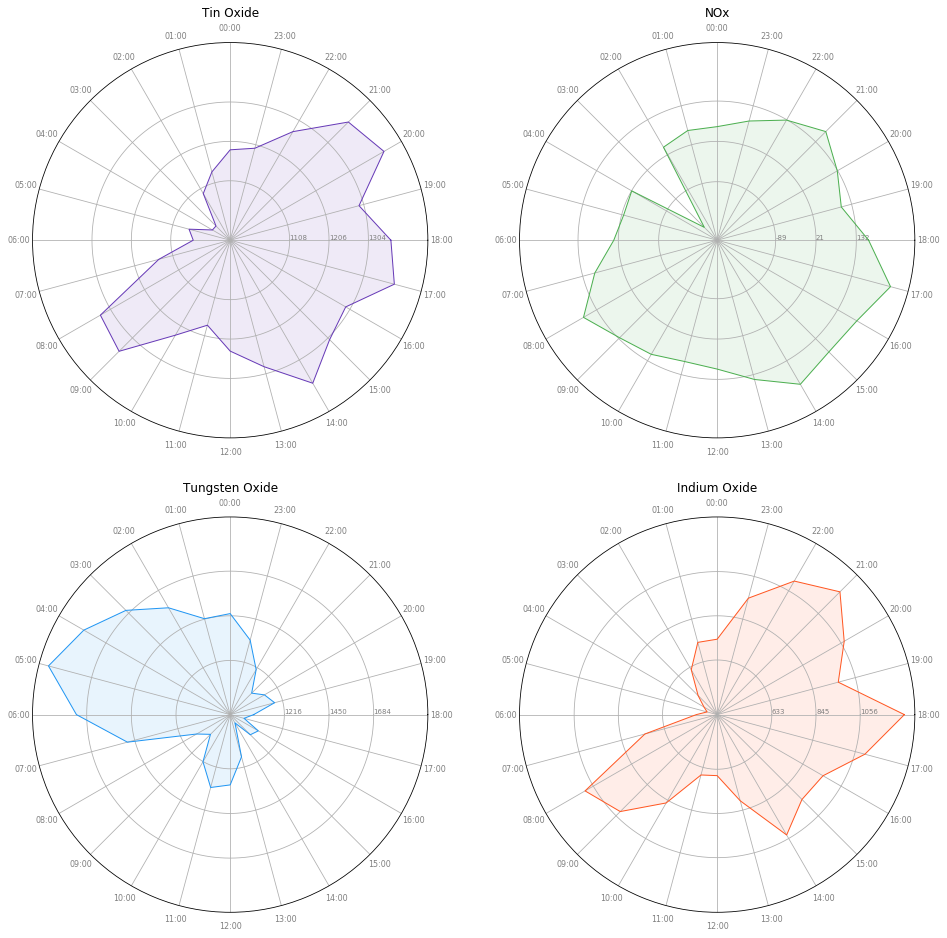

In [15]:
plt.figure(figsize=(16,16))
ax = plt.subplot(221, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)
difference_values = max(values_1) - min(values_1)
plt.yticks([min(values_1) + difference_values * 0.25, min(values_1) + difference_values * 0.5, min(values_1) + difference_values * 0.75], [str(int(min(values_1) + difference_values * 0.25)), str(int(min(values_1) + difference_values * 0.5)), str(int(min(values_1) + difference_values * 0.75))], color="grey", size=7)
plt.ylim(min(values_1) - 50, max(values_1) + 50)
plt.title("Tin Oxide")

ax.plot(angles, values_1, linewidth=1, linestyle='solid', color='#673AB7')
ax.fill(angles, values_1, '#673AB7', alpha=0.1)

ax = plt.subplot(222, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)
difference_values = max(values_2) - min(values_2)
plt.yticks([min(values_2) + difference_values * 0.25, min(values_2) + difference_values * 0.5, min(values_2) + difference_values * 0.75], [str(int(min(values_2) + difference_values * 0.25)), str(int(min(values_2) + difference_values * 0.5)), str(int(min(values_2) + difference_values * 0.75))], color="grey", size=7)
plt.ylim(min(values_2) - 50, max(values_2) + 50)
plt.title("NOx")

ax.plot(angles, values_2, linewidth=1, linestyle='solid', color='#4CAF50')
ax.fill(angles, values_2, '#4CAF50', alpha=0.1)

ax = plt.subplot(223, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)
difference_values = max(values_3) - min(values_3)
plt.yticks([min(values_3) + difference_values * 0.25, min(values_3) + difference_values * 0.5, min(values_3) + difference_values * 0.75], [str(int(min(values_3) + difference_values * 0.25)), str(int(min(values_3) + difference_values * 0.5)), str(int(min(values_3) + difference_values * 0.75))], color="grey", size=7)
plt.ylim(min(values_3) - 50, max(values_3) + 50)
plt.title("Tungsten Oxide")

ax.plot(angles, values_3, linewidth=1, linestyle='solid', color='#2196F3')
ax.fill(angles, values_3, '#2196F3', alpha=0.1)

ax = plt.subplot(224, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)
difference_values = max(values_4) - min(values_4)
plt.yticks([min(values_4) + difference_values * 0.25, min(values_4) + difference_values * 0.5, min(values_4) + difference_values * 0.75], [str(int(min(values_4) + difference_values * 0.25)), str(int(min(values_4) + difference_values * 0.5)), str(int(min(values_4) + difference_values * 0.75))], color="grey", size=7)
plt.ylim(min(values_4) - 50, max(values_4) + 50)
plt.title("Indium Oxide")

ax.plot(angles, values_4, linewidth=1, linestyle='solid', color='#FF5722')
ax.fill(angles, values_4, '#FF5722', alpha=0.1)

### Analysis of the noise data

In [16]:
data_details = noise_data.describe()
data_details

,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,55.155782,59.551600,47.906873,58.126618,62.136073,51.354218
std,3.567700,2.580956,4.915977,3.049675,2.251466,4.286102
min,45.410000,50.960000,37.930000,50.060000,56.000000,42.360000
25%,52.960000,57.915000,43.815000,56.070000,60.710000,47.860000
50%,55.200000,59.620000,47.850000,58.560000,62.410000,51.420000
75%,57.920000,61.235000,51.960000,60.610000,63.745000,55.215000
max,63.340000,66.620000,59.510000,64.050000,68.320000,60.280000


<IPython.core.display.Javascript object>


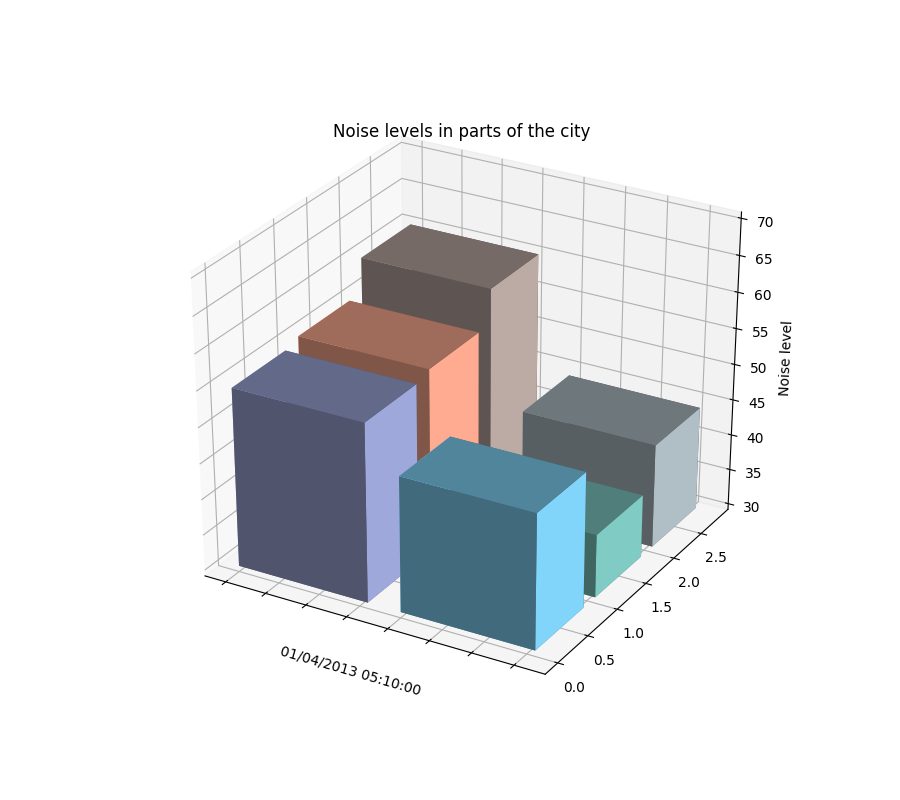

In [17]:
%matplotlib notebook
min_value = 30
max_value = 80
bottom = [min_value, min_value, min_value, min_value, min_value, min_value]
width = depth = 0.8

fig = plt.figure(figsize=(9, 8))
ax1 = fig.add_subplot(111, projection='3d')

for value in range(0, 50):
    ax1.clear()
        
    ax1.set_zlim(30,70)
    ax1.set_zlabel("Noise level")
    ax1.set_xlabel(noise_data['time'][value])
    
    top_value = [noise_data['loc_2'][value], noise_data['loc_1'][value], noise_data['loc_4'][value], noise_data['loc_3'][value], noise_data['loc_5'][value], noise_data['loc_6'][value]]

    # Code snippet for dynamic colors
    bar_colors = []
    all_colors = {
        'loc_1': ['#81D4FA', '#29B6F6', '#039BE5', '#0277BD'],
        'loc_2': ['#9FA8DA', '#5C6BC0', '#3949AB', '#283593'],
        'loc_3': ['#80CBC4', '#26A69A', '#00897B', '#00695C'],
        'loc_4': ['#FFAB91', '#FF7043', '#F4511E', '#D84315'],
        'loc_5': ['#BCAAA4', '#8D6E63', '#6D4C41', '#4E342E'],
        'loc_6': ['#B0BEC5', '#78909C', '#546E7A', '#37474F']
    }
    
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    for location in ['loc_2', 'loc_1', 'loc_4', 'loc_3', 'loc_5', 'loc_6']:
        if noise_data[location][value] > data_details[location]['75%']:
            bar_colors.append(all_colors[location][3])
        elif noise_data[location][value] > data_details[location]['50%']:
            bar_colors.append(all_colors[location][2])
        elif noise_data[location][value] > data_details[location]['25%']:
            bar_colors.append(all_colors[location][1])
        else:
            bar_colors.append(all_colors[location][0])

    ax1.bar3d([0,1,0,1,0,1], [0,0,1,1,2,2], bottom, width, depth, np.array(top_value) - min_value, shade=True, color=bar_colors)
    ax1.set_title('Noise levels in parts of the city')
    fig.canvas.draw()

    time.sleep(0.27)

The darker colors represent a larger magnitude of noise at the particular location.